In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the specified path
df = pd.read_csv("../data/processed/Fraud__Data.csv")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'device_id' column
df['device_id'] = label_encoder.fit_transform(df['device_id'])

# Optionally, save the updated DataFrame back to the CSV file
df.to_csv("../data/processed/Fraud__Data_Encoded.csv", index=False)

# Display the updated DataFrame
print(df.head())


   user_id  purchase_value  device_id  source  sex       age    ip_address  \
0   247547        0.546375      26918       2    0 -0.360216  1.677886e+07   
1   220737       -1.193991      40340       2    0  0.102304  1.684205e+07   
2   390400        0.383216      30757       0    1 -0.475846  1.684366e+07   
3    69592        0.981467      53074       1    0 -0.360216  1.693873e+07   
4   174987        0.763921      61816       2    0  0.449195  1.697198e+07   

   class  ip_address_int  purchase_time_diff  ...  purchase_hour  \
0      0       -1.730003                 0.0  ...              3   
1      0       -1.729900                 0.0  ...             20   
2      0       -1.729897                 0.0  ...             23   
3      0       -1.729742                 0.0  ...             16   
4      0       -1.729687                 0.0  ...              4   

   purchase_dayofweek  purchase_month  purchase_year  signup_hour  \
0                   6               8           2015 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("../data/processed/Fraud__Data.csv")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'device_id' column
df['device_id'] = label_encoder.fit_transform(df['device_id'])

# Convert 'purchase_time' and 'signup_time' to datetime
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['signup_time'] = pd.to_datetime(df['signup_time'])

# Extract useful time-related features for 'purchase_time'
df['purchase_hour'] = df['purchase_time'].dt.hour  # Hour of the day
df['purchase_dayofweek'] = df['purchase_time'].dt.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)
df['purchase_month'] = df['purchase_time'].dt.month  # Month (1 to 12)
df['purchase_year'] = df['purchase_time'].dt.year  # Year

# Extract useful time-related features for 'signup_time'
df['signup_hour'] = df['signup_time'].dt.hour  # Hour of the day
df['signup_dayofweek'] = df['signup_time'].dt.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)
df['signup_month'] = df['signup_time'].dt.month  # Month (1 to 12)
df['signup_year'] = df['signup_time'].dt.year  # Year

# Optionally, convert 'purchase_time' and 'signup_time' to Unix timestamp
df['purchase_time_numeric'] = df['purchase_time'].astype('int64') // 10**9  # Convert to seconds
df['signup_time_numeric'] = df['signup_time'].astype('int64') // 10**9  # Convert to seconds

# Drop the original 'purchase_time' and 'signup_time' columns
df = df.drop(columns=['purchase_time', 'signup_time'])

# Optionally, save the updated DataFrame
df.to_csv("../data/processed/Fraud__Data_Encoded.csv", index=False)

# Display the updated DataFrame
print(df.head())


In [13]:
import pandas as pd

# Load the datasets
fraud_data = pd.read_csv("../data/processed/Fraud__Data.csv")
creditcard_data = pd.read_csv("../data/processed/creditcard.csv")

# Separate features and target for both datasets
X_fraud = fraud_data.drop(columns=['class'])
y_fraud = fraud_data['class']

X_credit = creditcard_data.drop(columns=['Class'])
y_credit = creditcard_data['Class']

# Combine both datasets (ensure the features match)
X_combined = pd.concat([X_fraud, X_credit], axis=0)
y_combined = pd.concat([y_fraud, y_credit], axis=0)

# Train-Test Split for combined data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/processed/Fraud__Data.csv")

# Check for missing values (NaN or None) in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Option 1: Replace missing values with the column's mean (for numerical columns)
df.fillna(df.mean(), inplace=True)

# Option 2: Replace missing values with the mode (most frequent value) for categorical columns
# For categorical columns, you may want to replace NaNs with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again if there are any missing values after replacement
print("\nMissing values after replacement:")
print(df.isnull().sum())

# Optionally, save the updated DataFrame
df.to_csv("../data/processed/Fraud__Data_NoNulls.csv", index=False)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df.head())


Missing values in each column:
user_id                  0
purchase_value           0
device_id                0
source                   0
sex                      0
age                      0
ip_address               0
class                    0
ip_address_int           0
purchase_time_diff       0
hour_of_day              0
day_of_week              0
transaction_frequency    0
transaction_velocity     0
browser_FireFox          0
browser_IE               0
browser_Opera            0
browser_Safari           0
purchase_hour            0
purchase_dayofweek       0
purchase_month           0
purchase_year            0
signup_hour              0
signup_dayofweek         0
signup_month             0
signup_year              0
purchase_time_numeric    0
signup_time_numeric      0
dtype: int64

Missing values after replacement:
user_id                  0
purchase_value           0
device_id                0
source                   0
sex                      0
age                      0
ip_

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline with imputation, scaling, and logistic regression
logreg_model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values using the mean
    StandardScaler(),  # Scale the data
    LogisticRegression(random_state=42, max_iter=500)  # Increase max_iter if needed
)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)


In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import joblib

# Create a pipeline with imputation, scaling, and logistic regression
logreg_model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values using the mean
    StandardScaler(),  # Scale the data
    LogisticRegression(random_state=42, max_iter=500)  # Increase max_iter if needed
)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Step 2: Save the trained Logistic Regression model
model_path = "../models/trained_models/logistic_regression_model.joblib"
joblib.dump(logreg_model, model_path)

print(f"Logistic Regression model saved to: {model_path}")

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Logistic Regression model saved to: ../models/trained_models/logistic_regression_model.joblib
Accuracy: 0.988109376964887
Confusion Matrix:
[[70042    58]
 [  793   676]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     70100
           1       0.92      0.46      0.61      1469

    accuracy                           0.99     71569
   macro avg       0.95      0.73      0.80     71569
weighted avg       0.99      0.99      0.99     71569



In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
import joblib

# Create a pipeline with imputation, scaling, and decision tree classifier
dt_model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values using the mean
    StandardScaler(),  # Scale the data
    DecisionTreeClassifier(random_state=42)  # Decision Tree Classifier
)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Step 2: Save the trained Logistic Regression model
model_path = "../models/trained_models/Decision_Tree_model.joblib"
joblib.dump(logreg_model, model_path)

print(f"Logistic Regression model saved to: {model_path}")

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Logistic Regression model saved to: ../models/trained_models/Decision_Tree_model.joblib
Accuracy: 0.9794324358311559
Confusion Matrix:
[[69252   848]
 [  624   845]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     70100
           1       0.50      0.58      0.53      1469

    accuracy                           0.98     71569
   macro avg       0.75      0.78      0.76     71569
weighted avg       0.98      0.98      0.98     71569



In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import joblib

# Create a pipeline with imputation, scaling, and random forest classifier
rf_model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values using the mean
    StandardScaler(),  # Scale the data
    RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest Classifier
)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Step 2: Save the trained Random_Forest model
model_path = "../models/trained_models/Random_Forest_model.joblib"
joblib.dump(logreg_model, model_path)

print(f"Logistic Regression model saved to: {model_path}")

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Logistic Regression model saved to: ../models/trained_models/Random_Forest_model.joblib
Accuracy: 0.9905685422459445
Confusion Matrix:
[[70075    25]
 [  650   819]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     70100
           1       0.97      0.56      0.71      1469

    accuracy                           0.99     71569
   macro avg       0.98      0.78      0.85     71569
weighted avg       0.99      0.99      0.99     71569



In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import joblib

# Create a pipeline with imputation, scaling, and gradient boosting classifier
gb_model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values using the mean
    StandardScaler(),  # Scale the data
    GradientBoostingClassifier(n_estimators=100, random_state=42)  # Gradient Boosting Classifier
)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)


# Step 2: Save the trained Gradient_Boosting model
model_path = "../models/trained_models/Gradient_Boosting_model.joblib"
joblib.dump(logreg_model, model_path)

print(f"Logistic Gradient_Boosting saved to: {model_path}")

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Logistic Gradient_Boosting saved to: ../models/trained_models/Gradient_Boosting_model.joblib
Accuracy: 0.9903449817658483
Confusion Matrix:
[[70065    35]
 [  656   813]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     70100
           1       0.96      0.55      0.70      1469

    accuracy                           0.99     71569
   macro avg       0.97      0.78      0.85     71569
weighted avg       0.99      0.99      0.99     71569



In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import joblib

# Create a pipeline with imputation, scaling, and multi-layer perceptron classifier
mlp_model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values using the mean
    StandardScaler(),  # Scale the data
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  # MLP Classifier with 1 hidden layer of 100 neurons
)

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_model.predict(X_test)

# Step 2: Save the trained MLP Classifier model
model_path = "../models/trained_models/MLP_Classifier_model.joblib"
joblib.dump(logreg_model, model_path)

print(f"Logistic MLP Classifier saved to: {model_path}")

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Logistic MLP Classifier saved to: ../models/trained_models/MLP_Classifier_model.joblib
Accuracy: 0.9904288169458844
Confusion Matrix:
[[70069    31]
 [  654   815]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     70100
           1       0.96      0.55      0.70      1469

    accuracy                           0.99     71569
   macro avg       0.98      0.78      0.85     71569
weighted avg       0.99      0.99      0.99     71569



In [24]:
# Load the trained model
import joblib
model_path = "../models/trained_models/logistic_regression_model.joblib"
model = joblib.load(model_path)

# If the model is a pipeline, extract the classifier step
if hasattr(model, 'named_steps'):
    model_step = model.named_steps['logisticregression']  # This depends on the name of your step in the pipeline
else:
    model_step = model


In [19]:
# Fill missing values in X_train before using with SHAP
X_train.fillna(X_train.mean(), inplace=True)  # For numerical columns
categorical_columns_train = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns_train:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)

# Check if there are still any missing values in X_train
if X_train.isnull().sum().sum() > 0:
    print("There are still missing values in X_train!")
else:
    print("No missing values in X_train.")


No missing values in X_train.


C:\Users\User\AppData\Local\Temp\ipykernel_18124\1569569420.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mode()[0], inplace=True)


SHAP values and plots saved in ./models/shaped_values


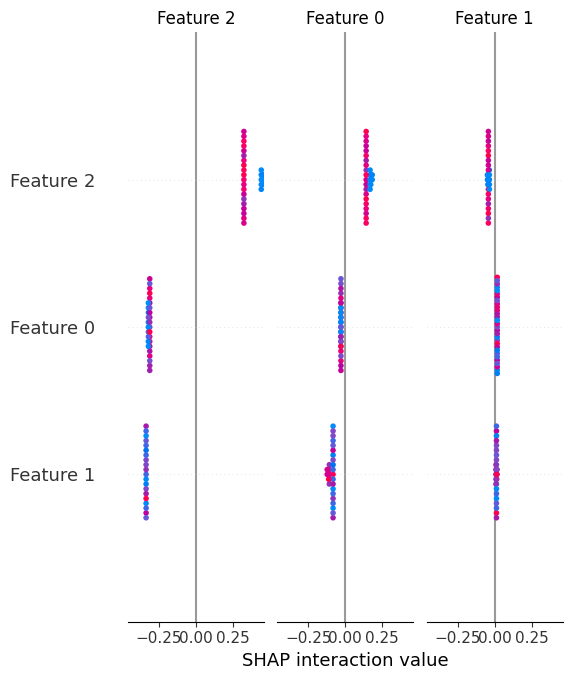

In [39]:
import matplotlib.pyplot as plt
import os
import shap
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Example dataset
# X, y are your features and labels, e.g., from a dataset you have
# Here, it's just an example dataset
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # Scaling the data
    ('model_name', RandomForestClassifier())     # RandomForest as an example model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Extract the model from the pipeline
model = pipeline.named_steps['model_name']  # Replace 'model_name' with the actual name of your model step

# Check if the model is a tree-based model (e.g., RandomForest, XGBoost)
if hasattr(model, 'predict_proba'):
    explainer = shap.TreeExplainer(model)
else:
    explainer = shap.KernelExplainer(model.predict, X_train)  # For non-tree models, use KernelExplainer

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Create a path to save the SHAP summary plot
summary_plot_path = os.path.join('./models/shaped_values', "shap_summary_plot.png")

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)

# Save the plot
plt.savefig(summary_plot_path)

print(f"SHAP values and plots saved in {'./models/shaped_values'}")
